##Finance pretiction AI


In [146]:
#import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf


In [147]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [148]:
#Load Data
company = 'AAPL'
start = dt.datetime(2012,1,1)
end = dt.datetime(2023, 1,1)

In [149]:
data = yf.download(company,start, end)

[*********************100%%**********************]  1 of 1 completed


In [150]:
#prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [151]:
prediction_days = 60

In [152]:
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [153]:
# build the model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #predition of the next stock price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
85/85 [==============================] - 15s 109ms/step - loss: 0.0094
Epoch 2/20
85/85 [==============================] - 7s 85ms/step - loss: 0.0021
Epoch 3/20
85/85 [==============================] - 9s 109ms/step - loss: 0.0020
Epoch 4/20
85/85 [==============================] - 7s 84ms/step - loss: 0.0020
Epoch 5/20
85/85 [==============================] - 9s 109ms/step - loss: 0.0016
Epoch 6/20
85/85 [==============================] - 8s 94ms/step - loss: 0.0020
Epoch 7/20
85/85 [==============================] - 8s 99ms/step - loss: 0.0018
Epoch 8/20
85/85 [==============================] - 9s 107ms/step - loss: 0.0014
Epoch 9/20
85/85 [==============================] - 7s 86ms/step - loss: 0.0015
Epoch 10/20
85/85 [==============================] - 9s 108ms/step - loss: 0.0015
Epoch 11/20
85/85 [==============================] - 8s 90ms/step - loss: 0.0016
Epoch 12/20
85/85 [==============================] - 9s 108ms/step - loss: 0.0014
Epoch 13/20
85/85 [===========

In [154]:
test_start = dt.datetime(2023,1,1)
test_end = dt.datetime.now()

test_data = yf.download(company, start , end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']))

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


[*********************100%%**********************]  1 of 1 completed


In [155]:
# Make predictions on test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)

87/87 [==============================] - 5s 34ms/step


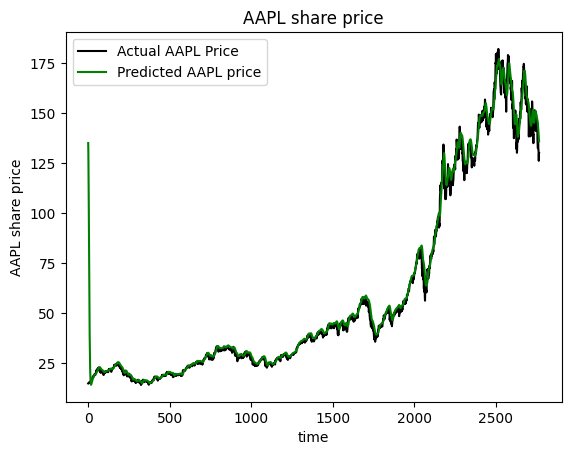

In [156]:
# Plot the test predictions
plt.plot(actual_prices, color = 'black', label=f"Actual {company} Price")
plt.plot(predicted_prices, color = 'green', label=f"Predicted {company} price")
plt.title(f"{company} share price")
plt.xlabel('time')
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()

In [157]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs)]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[134.94069]]
